# Training an intents classification model

Define constants

In [1]:
from os import getcwd, path
import sys
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = path.dirname(getcwd())
sys.path.append(BASE_PATH)

DATA_UTILS = path.join(BASE_PATH, 'common/data_utils.py')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')
CLASSES_FILE = path.join(BASE_PATH, 'classes.json')

In [2]:
exec(open(DATA_UTILS).read())

Use functions from the utils to extract and preprocess the training data
Refer to `kc_data.json` for the sample data format
`get_data_pairs` is then used to parse data into a tuple of `([list_of_sentences], [list_of_labels])`

In [3]:
X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    classes.index(item)
    for item in y_data
], dtype='int32')

Plot the training data

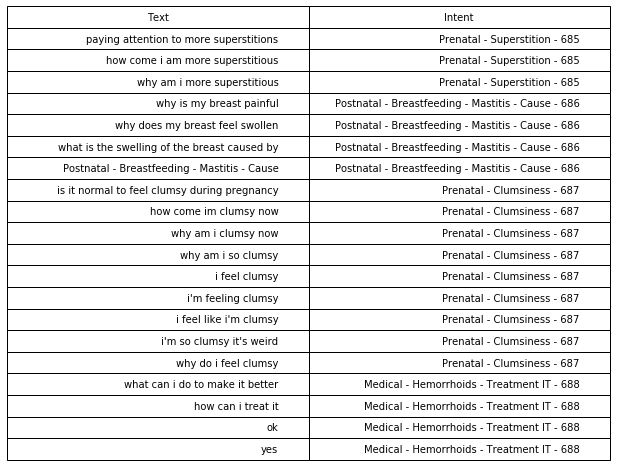

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(int(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [5]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Save the classes descriptions as json

In [6]:
import json

with open(CLASSES_FILE, 'w') as classes_file:
    json.dump(classes, classes_file)

In [7]:
import torch
torch.__version__

'0.4.1'

Start training the classification model and save

In [8]:
from text_classification.fast_text.model import FastTextWrapper
from text_classification.fast_text.train import FastTextLearner
from common.callbacks import PrintLoggerCallback

model = FastTextWrapper({'num_classes': num_classes})
learner = FastTextLearner(
    model,
    optimizer_fn='adam'
#     optimizer_fn='sgd',
#     optimizer_kwargs={'lr': 1e-2, 'momentum': .9}
)

In [9]:
learner.fit(
    training_data=(X_train, y_train), 
    epochs=50, 
    callbacks=[PrintLoggerCallback(log_every=5)]
)

3m 43s (- 33m 29s) (5 10%) - loss: 78.0549 - accuracy: 0.0000
7m 27s (- 29m 51s) (10 20%) - loss: 96.2142 - accuracy: 0.0000
11m 40s (- 27m 14s) (15 30%) - loss: 148.8632 - accuracy: 0.0000
15m 18s (- 22m 58s) (20 40%) - loss: 100.1641 - accuracy: 0.0000
19m 13s (- 19m 13s) (25 50%) - loss: 153.2185 - accuracy: 0.0000
22m 38s (- 15m 5s) (30 60%) - loss: 49.9810 - accuracy: 0.0000
25m 58s (- 11m 7s) (35 70%) - loss: 53.6683 - accuracy: 0.2500
29m 15s (- 7m 18s) (40 80%) - loss: 54.9525 - accuracy: 0.2500
32m 38s (- 3m 37s) (45 90%) - loss: 46.0700 - accuracy: 0.2500
36m 29s (- 0m 0s) (50 100%) - loss: 52.5824 - accuracy: 0.6250


In [10]:
torch.topk(model(['please, no']), 50)

(tensor([[0.0281, 0.0234, 0.0212, 0.0211, 0.0207, 0.0206, 0.0203, 0.0186, 0.0166,
          0.0165, 0.0163, 0.0163, 0.0162, 0.0157, 0.0148, 0.0147, 0.0143, 0.0143,
          0.0138, 0.0132, 0.0131, 0.0129, 0.0124, 0.0115, 0.0114, 0.0110, 0.0110,
          0.0110, 0.0107, 0.0107, 0.0107, 0.0106, 0.0106, 0.0104, 0.0098, 0.0098,
          0.0094, 0.0091, 0.0087, 0.0086, 0.0085, 0.0085, 0.0083, 0.0080, 0.0079,
          0.0077, 0.0076, 0.0074, 0.0074, 0.0073]]),
 tensor([[ 552, 1198, 1320, 1358,  982, 1062, 1183,  542, 1154,  289,  916,  838,
          1331,  495,  449,   87, 1100, 1204,  677,  363,  637,  780,  910,  389,
          1138,  837,  764, 1025, 1077,  553, 1223,  557, 1078,  404,  610, 1179,
           800,  918,  498,  861,  246,   52, 1191,   82,  388,  293,  997,  862,
           337,  497]]))

In [12]:
classes[552]

'BabyNames-Flower-[Action]'